In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt 


data = pd.read_csv("D:\Kuliah\VSCode\ML\Heart attack\data\processed\processed.csv")
data.head()

<>:9: SyntaxWarning: invalid escape sequence '\K'
<>:9: SyntaxWarning: invalid escape sequence '\K'
C:\Users\hasri\AppData\Local\Temp\ipykernel_15664\3352612944.py:9: SyntaxWarning: invalid escape sequence '\K'
  data = pd.read_csv("D:\Kuliah\VSCode\ML\Heart attack\data\processed\processed.csv")


,num__age,num__hypertension,num__diabetes,num__cholesterol_level,num__obesity,num__waist_circumference,num__family_history,num__previous_heart_disease,num__medication_usage,num__participated_in_free_screening,...,cat__dietary_habits_Unhealthy,cat__air_pollution_exposure_High,cat__air_pollution_exposure_Low,cat__air_pollution_exposure_Moderate,cat__stress_level_High,cat__stress_level_Low,cat__stress_level_Moderate,cat__EKG_results_Abnormal,cat__EKG_results_Normal,heart_attack
0,0.458088,-0.653202,2.001224,0.288563,-0.577197,-0.626810,-0.654993,-0.500898,-0.999539,-1.227375,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,-0.129611,-0.653202,-0.499694,0.213067,-0.577197,0.777156,1.526733,1.996415,-0.999539,0.814747,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,0.626002,-0.653202,-0.499694,0.791866,1.732510,1.143409,1.526733,-0.500898,1.000461,-1.227375,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,1.549529,1.530920,-0.499694,0.062076,-0.577197,-0.687852,1.526733,-0.500898,1.000461,0.814747,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,-0.213568,1.530920,-0.499694,0.817031,-0.577197,-0.260558,-0.654993,1.996415,-0.999539,0.814747,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [3]:
X = data.drop("heart_attack", axis=1)
y = data["heart_attack"]

train_X, test_X, train_y, test_y = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(train_X, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.7268794796501531
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     18971
           1       0.69      0.58      0.63     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.70      0.71     31671
weighted avg       0.72      0.73      0.72     31671

Confusion Matrix:
 [[15648  3323]
 [ 5327  7373]]


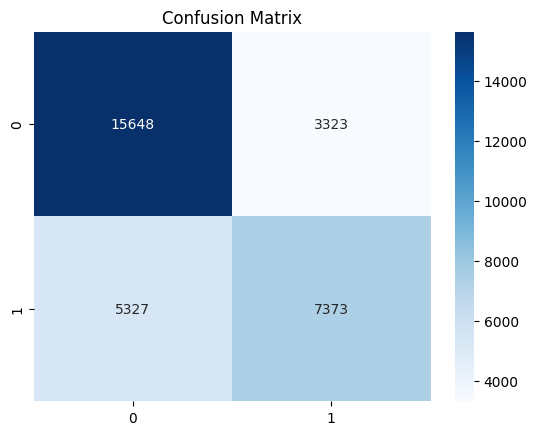

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(test_X)
print("Accuracy:",accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))

sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [9]:
corr_to_target = (
    data.corr(numeric_only=True)["heart_attack"]
      .sort_values(ascending=False)
)
print(corr_to_target)

heart_attack                            1.000000
num__previous_heart_disease             0.274775
num__hypertension                       0.269261
num__diabetes                           0.194512
num__obesity                            0.171720
cat__smoking_status_Current             0.170858
num__age                                0.105756
num__cholesterol_level                  0.092611
num__fasting_blood_sugar                0.069826
num__waist_circumference                0.067883
cat__region_Rural                       0.005585
cat__dietary_habits_Healthy             0.005271
cat__air_pollution_exposure_Moderate    0.005230
num__medication_usage                   0.004694
cat__alcohol_consumption_High           0.004618
cat__alcohol_consumption_Moderate       0.004130
cat__gender_Female                      0.003502
cat__physical_activity_High             0.003455
cat__stress_level_Low                   0.003424
cat__EKG_results_Normal                 0.002583
cat__stress_level_Hi